In [20]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.svm import LinearSVC
#from sklearn.svm import SVC
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.decomposition import PCA as RandomizedPCA

In [21]:
# importing dataset
dataset_train = pd.read_csv('Hackathon_Autumn2020_Challenge/challenge_dataset/train_data_imputed.csv', index_col=0)
dataset_unseen = pd.read_csv('Hackathon_Autumn2020_Challenge/challenge_dataset/unseen_data_imputed.csv', index_col=0)
#print(dataset_train)
#print(dataset_unseen)

In [23]:
# creating dictionary for column encoding
codes = pd.read_excel('Hackathon_Autumn2020_Challenge/challenge_dataset/NHANES_variables_lookup.xlsx', index_col=0)
#print(codes)
aux=codes[codes.columns[0]]
codes_dict = aux[0:-1].to_dict()
print(codes_dict)

{'BMXWT': 'Weight (kg)', 'BMXBMI': 'Body Mass Index (kg/m**2)', 'BMXWAIST': 'Waist Circumference (cm)', 'ALQ120Q': 'How often drink alcohol over past 12 mos', 'BPXSAR': 'SBP average reported to examinee', 'BPXDAR': 'DBP average reported to examinee', 'RIDAGEMN': 'Age in Months - Recode', 'INDFMPIR': 'Family PIR\t', 'DRXTKCAL': 'Energy (kcal)\t', 'DRXTPROT': 'Protein (gm)\t', 'DRXTCARB': 'Carbohydrate (gm)\t', 'DRXTTFAT': 'Total fat (gm)', 'DRXTSFAT': 'Total saturated fatty acids (gm)', 'DRXTMFAT': 'Total monounsaturated fatty acids (gm)', 'DRXTPFAT': 'Total polyunsaturated fatty acids (gm)', 'DRXTCHOL': 'Cholesterol (mg)', 'DRXTFIBE': 'Dietary fiber (gm)', 'DRXTVB1': 'Thiamin (Vitamin B1) (mg)', 'DRXTVB2': 'Riboflavin (Vitamin B2) (mg)', 'DRXTFOLA': 'Total Folate (mcg)', 'DRXTVB12': 'Vitamin B12 (mcg)', 'DRXTVC': 'Vitamin C (mg)', 'DRXTCALC': 'Calcium (mg)', 'DRXTMAGN': 'Magnesium (mg)', 'DRXTIRON': 'Iron (mg)', 'DRXTZINC': 'Zinc (mg)', 'DRXTCAFF': 'Caffeine (mg)', 'DRXTALCO': 'Alcohol

In [24]:
# mortality (last column) is the target, all the other columns are features
features = dataset_train.columns[0:-1]
targets = dataset_train.columns[-1]

Text(0, 0.5, 'correlation with mortstat')

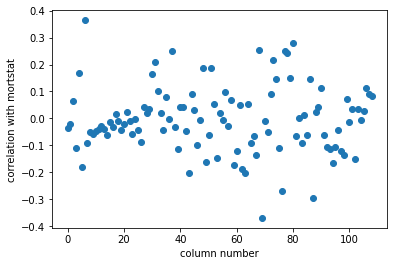

In [25]:
# Checking the correlation between all features and mortality
a = dataset_train[features].corrwith(dataset_train[targets], method='kendall')
plt.scatter(range(a.size),a)
plt.xlabel('column number')
plt.ylabel('correlation with mortstat')

In [26]:
# choosing the features with a correlation higher than 25% to be relevant
new_features = features[abs(a)>0.25]
#print(new_features)
print(a[new_features])

RIDAGEMN    0.364231
URXUMASI    0.251613
HID030A     0.254850
HID030B    -0.369297
PAQ180     -0.269783
PAD200      0.250774
PAQ480      0.280058
VIQ070     -0.295825
dtype: float64


In [27]:
# having a look at the selected features
dataset_train_selected = pd.concat([dataset_train[new_features] , dataset_train[targets]], axis=1)
dataset_train_selected.describe()

,RIDAGEMN,URXUMASI,HID030A,HID030B,PAQ180,PAD200,PAQ480,VIQ070,mortstat
count,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000
mean,773.538559,317.345420,1.508217,1.530973,1.721871,2.017699,2.921618,1.825537,0.539823
std,134.344214,1242.240425,0.825002,0.780288,0.757086,0.562265,1.637047,0.569170,0.498727
min,480.000000,0.200000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,679.000000,7.300000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000
50%,784.000000,23.300000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,1.000000
75%,875.000000,133.900000,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000,1.000000
max,1016.000000,16920.000000,9.000000,9.000000,7.000000,7.000000,6.000000,9.000000,1.000000


In [28]:
dataset_train_clean = dataset_train_selected[(np.abs(stats.zscore(dataset_train_selected)) < 3).all(axis=1)]
dataset_train_clean.describe()

,RIDAGEMN,URXUMASI,HID030A,HID030B,PAQ180,PAD200,PAQ480,VIQ070,mortstat
count,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000
mean,776.458950,171.420372,1.452221,1.471063,1.646030,2.014805,2.927322,1.795424,0.537012
std,132.689038,429.212966,0.498047,0.499498,0.618565,0.538087,1.641804,0.403663,0.498964
min,480.000000,0.200000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,686.000000,7.300000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000
50%,785.000000,21.900000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,1.000000
75%,877.000000,118.028600,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000,1.000000
max,1016.000000,3860.000000,2.000000,2.000000,3.000000,3.000000,6.000000,2.000000,1.000000


In [29]:
# putting data in linear system format
X = dataset_train[new_features].values
y = dataset_train[targets].values

In [30]:
# splitting our dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [31]:
# testing dataset
X_test = dataset_unseen[new_features].values
y_test = dataset_unseen[targets].values

In [32]:
# Normalisation
scaler = QuantileTransformer(n_quantiles=100)
scaler.fit(X_train)

X_train_normalized = scaler.transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

In [33]:
# training model
clf = LinearSVC(random_state=0)
clf.fit(X_train_normalized, y_train)

#clf = RandomizedPCA(svd_solver='randomized', whiten=True)
#clf.fit(X_train_normalized, y_train)
#X = clf.transform(X_train_normalized)
#print(X_train_normalized)
#print(X)
#print (clf.explained_variance_ratio_ )


LinearSVC(random_state=0)

In [34]:
# Model evaluation
pred = clf.predict(X_val_normalized)
acc = accuracy_score(y_val, pred)
print(f'Model Accuracy: {acc}')

Model Accuracy: 0.7484276729559748


In [35]:
test_pred = clf.predict(X_test_normalized)
test_acc = accuracy_score(y_test, test_pred)
print(f'Model Final Accuracy: {test_acc}')

Model Final Accuracy: 0.7727272727272727


In [326]:
#print(dataset_train.rename(columns=codes_dict).head(3))

In [36]:
print(dataset_train_clean.rename(columns=codes_dict).head(5))

       Age in Months - Recode  Albumin, urine (mg/L) SI  \
10004                     559                      93.0   
10101                     821                       3.9   
10104                     620                       4.1   
10131                     980                      81.1   
10249                     692                      82.1   

       Covered by private insurance  Covered by Medicare  \
10004                             1                    2   
10101                             1                    2   
10104                             2                    2   
10131                             1                    1   
10249                             1                    2   

       Avg level of physical activity each day  \
10004                                        2   
10101                                        2   
10104                                        2   
10131                                        1   
10249                             